In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('LLM09joined_dataset.csv')

In [4]:
df['versions']

0       [{'version': 'v1', 'created': 'Mon, 25 Feb 201...
1       [{'version': 'v1', 'created': 'Tue, 5 Mar 2019...
2       [{'version': 'v1', 'created': 'Thu, 21 Mar 201...
3       [{'version': 'v1', 'created': 'Fri, 22 Mar 201...
4       [{'version': 'v1', 'created': 'Wed, 27 Mar 201...
                              ...                        
5093    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
5094    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
5095    [{'version': 'v1', 'created': 'Sat, 30 Sep 202...
5096    [{'version': 'v1', 'created': 'Sat, 30 Sep 202...
5097    [{'version': 'v1', 'created': 'Fri, 29 Sep 202...
Name: versions, Length: 5098, dtype: object

In [5]:
import pandas as pd
import datetime
import ast

# the original 'versions' column is a string representation of a list of dictionaries, so we need to convert it to a list of dictionaries by using ast.literal_eval
df['versions'] = df['versions'].apply(ast.literal_eval)

def convert_time(lst):
    for d in lst:
        dt = datetime.datetime.strptime(d['created'], '%a, %d %b %Y %H:%M:%S %Z')
        dt = dt.replace(second=0, microsecond=0)
        d['created'] = dt
    return lst

df['versions'] = df['versions'].apply(convert_time)

In [9]:
def get_first_submit_time(lst):
    times = [d['created'] for d in lst]
    return min(times).replace(second=0, microsecond=0)

df['firstSubmitTime'] = df['versions'].apply(get_first_submit_time)

In [10]:
df['firstSubmitTime']

0      2019-02-25 05:56:00
1      2019-03-05 05:00:00
2      2019-03-21 07:19:00
3      2019-03-22 01:41:00
4      2019-03-27 14:11:00
               ...        
5093   2023-09-29 14:38:00
5094   2023-09-29 16:30:00
5095   2023-09-30 08:05:00
5096   2023-09-30 20:18:00
5097   2023-09-29 22:55:00
Name: firstSubmitTime, Length: 5098, dtype: datetime64[ns]

# Average Time Interval (Innovation Speed)

In [13]:
df = df.sort_values('firstSubmitTime')
df['TimeInterval'] = df['firstSubmitTime'].diff().dt.total_seconds() / 3600  # convert to hours
df['Month'] = df['firstSubmitTime'].dt.to_period('M')
ati = df.groupby('Month')['TimeInterval'].mean()

In [16]:
IS = 1/ati

In [ ]:
IS

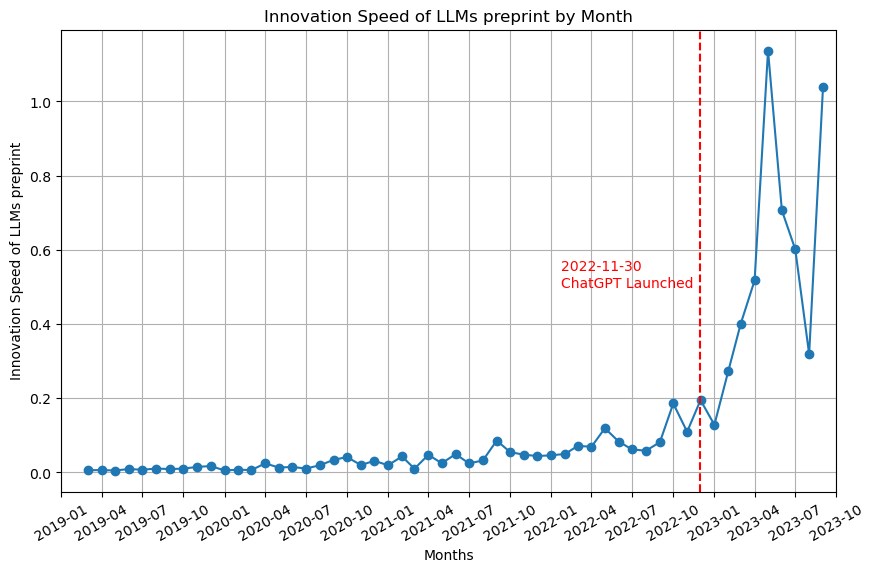

In [31]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(IS.index.to_timestamp(), IS.values, marker='o')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # set x-ticks every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # format x-ticks as 'YYYY-MM'
ax.set_xlim([pd.Timestamp('2019-01'), pd.Timestamp('2023-10')])  # set x-axis limits
plt.xticks(rotation=30)
plt.xlabel('Months')
plt.ylabel('Innovation Speed of LLMs preprint')
plt.title('Innovation Speed of LLMs preprint by Month')
plt.grid(True)
ax.axvline(pd.Timestamp('2022-11-30'), color='r', linestyle='--')  # add vertical line
ax.annotate('2022-11-30\nChatGPT Launched', xy=(pd.Timestamp('2022-11-30'), 0.5), xycoords='data', xytext=(-100,0), textcoords='offset points', color='r')  # add annotation
plt.show()